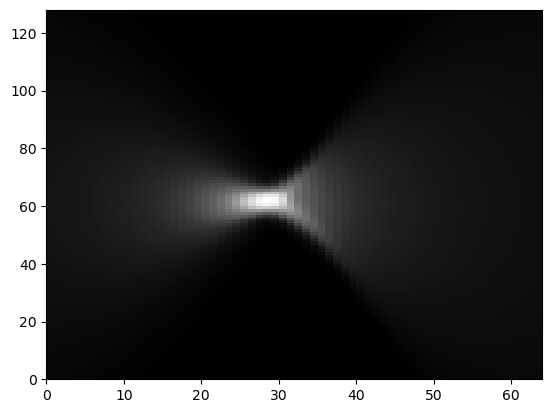

3.7280428106612105e-07


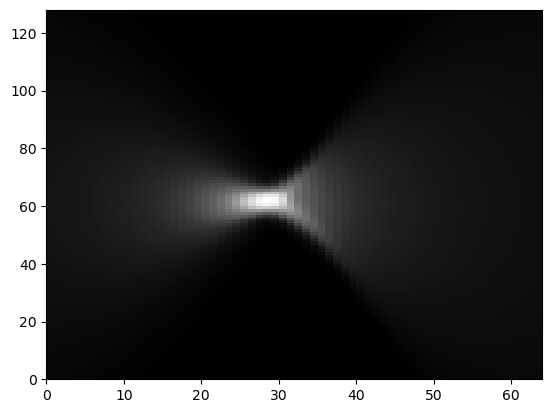

(8000, 64, 128) (8000, 7)
Min, Max of Training:  12.18717593564433 6522580774.213814


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

X = np.load("I_data.npy")
Y = np.load("target_data.npy")

frame = 1
plt.pcolormesh(X[frame, :, :].T, cmap="Greys_r")
plt.show()

print(np.max(Y))
Y /= np.max(Y)
# X /= np.max(X)


# X_max_axis = np.max(X, axis=2)
# for i in range(1000):
#     X[i] = (X[i].T / X_max_axis[i]).T

# X = X**1.4

# X = np.log(1+X)

# for i in range(len(X)):
#     X[i] = np.gradient(X[i], axis=0)

plt.pcolormesh(X[frame, :, :].T/np.max(X[frame, :, :].T), cmap="Greys_r")
plt.show()

print(X.shape, Y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42  # test_size - доля тестовой выборки (20% в данном случае)
)

min_training_data = X_train.min()
max_training_data = X_train.max()

print("Min, Max of Training: ", min_training_data, max_training_data)

# data type: images— 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
#            could also be Timeseries data or sequence data— 3D tensors of shape (samples, timesteps, features)
#            right now our data is (samples, features (256), timesteps (65))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_train = X_train.astype('float32')
X_train = (X_train - min_training_data) / (max_training_data - min_training_data)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
X_test = X_test.astype('float32')
X_test = (X_test - min_training_data) / (max_training_data - min_training_data)

Epoch 1/700
200/200 [==============================] - 9s 13ms/step - loss: 0.0228 - accuracy: 0.3663 - val_loss: 0.0207 - val_accuracy: 0.4131
Epoch 2/700
200/200 [==============================] - 2s 11ms/step - loss: 0.0202 - accuracy: 0.4236 - val_loss: 0.0192 - val_accuracy: 0.4313
Epoch 3/700
200/200 [==============================] - 2s 12ms/step - loss: 0.0188 - accuracy: 0.4319 - val_loss: 0.0175 - val_accuracy: 0.4656
Epoch 4/700
200/200 [==============================] - 2s 11ms/step - loss: 0.0171 - accuracy: 0.4694 - val_loss: 0.0151 - val_accuracy: 0.5044
Epoch 5/700
200/200 [==============================] - 2s 12ms/step - loss: 0.0154 - accuracy: 0.5061 - val_loss: 0.0136 - val_accuracy: 0.5331
Epoch 6/700
200/200 [==============================] - 2s 12ms/step - loss: 0.0142 - accuracy: 0.5323 - val_loss: 0.0132 - val_accuracy: 0.5125
Epoch 7/700
200/200 [==============================] - 2s 11ms/step - loss: 0.0135 - accuracy: 0.5534 - val_loss: 0.0130 - val_accuracy:

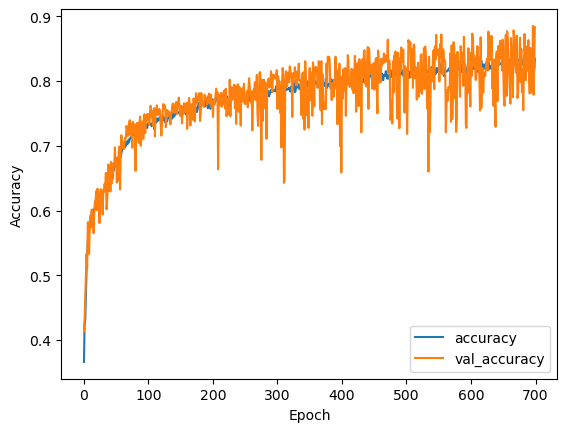

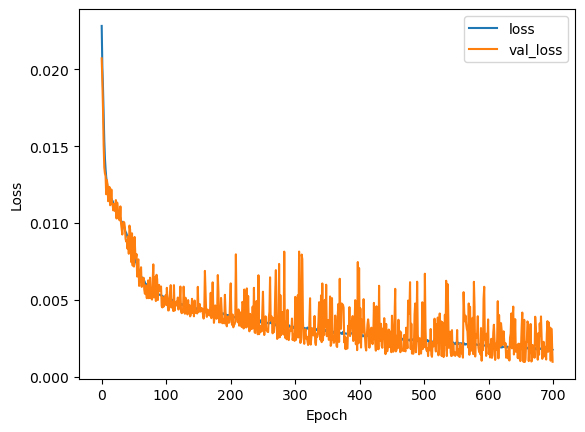

In [2]:
from tensorflow.keras import models, layers, Sequential

def get_model(input_shape):
    model = Sequential([
        layers.InputLayer(input_shape=(64, 128, 1)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(7)  # Output layer with number of coefficients
    ])
    return model

# Создание модели
model = get_model(input_shape=(X_train.shape[1], X_train.shape[2], 1))

# Компиляция модели
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=700, batch_size=32, validation_data=(X_test, y_test))

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Графики обучения (по желанию)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [4]:
from tensorflow.keras import models, layers

def get_model(
    architecture = "convnet", # not used!
    kernel_size = (3, 3),
    pool_size = (2, 2),
    activation = 'relu', # 'tanh', #  'softmax'
    padding = 'same',
    input_shape = tuple((128, 64, 1)),
    output_size = 7,
    ):

    model = models.Sequential()

    model.add(layers.Conv2D(8, name='conv1', kernel_size=kernel_size, activation=activation, padding=padding,
                            input_shape=input_shape))
    model.add(layers.Conv2D(8, name='conv2', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.MaxPooling2D(name='maxpool1', pool_size=pool_size))

    model.add(layers.Conv2D(16, name='conv3', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.Conv2D(16, name='conv4', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.MaxPooling2D(name='maxpool2', pool_size=pool_size))

    model.add(layers.Conv2D(32, name='conv5', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.Conv2D(32, name='conv6', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.MaxPooling2D(name='maxpool3', pool_size=pool_size))

    model.add(layers.Conv2D(64, name='conv7', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.Conv2D(64, name='conv8', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.MaxPooling2D(name='maxpool4', pool_size=pool_size))

    model.add(layers.Conv2D(128, name='conv9', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.Conv2D(128, name='conv10', kernel_size=kernel_size, activation=activation, padding=padding))
    try:
        if input_shape[0] == 1:
            model.add(layers.MaxPooling2D(name='maxpool5', pool_size=(1, 2)))
        else:
            model.add(layers.MaxPooling2D(name='maxpool5', pool_size=(2, 2)))
    except:
        model.add(layers.MaxPooling2D(name='maxpool5', pool_size=(1, 1)))

    model.add(layers.Flatten(name='flat'))
    model.add(layers.Dense(64, name='dense1', activation=activation))
    model.add(layers.Dense(64, name='dense2', activation=activation))
    model.add(layers.Dense(output_size, name='Y', activation='linear'))

    print(model.summary())
    return model


# Создание модели
model = get_model(input_shape=(X_train.shape[1], X_train.shape[2], 1))

# Компиляция модели
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Графики обучения (по желанию)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 64, 128, 8)        80        
_________________________________________________________________
conv2 (Conv2D)               (None, 64, 128, 8)        584       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 32, 64, 8)         0         
_________________________________________________________________
conv3 (Conv2D)               (None, 32, 64, 16)        1168      
_________________________________________________________________
conv4 (Conv2D)               (None, 32, 64, 16)        2320      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 16, 32, 16)        0         
_________________________________________________________________
conv5 (Conv2D)               (None, 16, 32, 32)        4

KeyboardInterrupt: 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 64, 128, 8)        80        
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 32, 64, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 64, 16)        1168      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 16, 32, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 16, 32, 32)        4640      
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 8, 16, 32)         0         
_________________________________________________________________
flat (Flatten)               (None, 4096)             

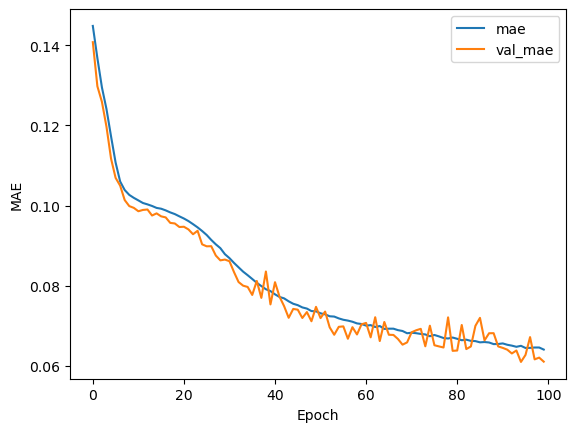

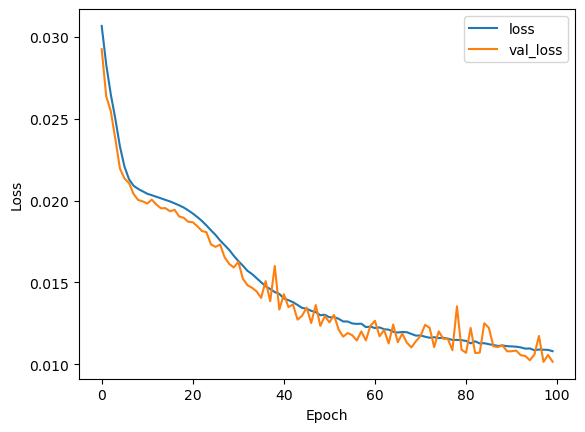

In [28]:
from tensorflow.keras import models, layers

def get_model(
    architecture = "convnet", # not used!
    kernel_size = (3, 3),
    pool_size = (2, 2),
    activation = 'relu', # 'tanh', #  'softmax'
    padding = 'same',
    input_shape = tuple((128, 64, 1)),
    output_size = 7,
    ):

    model = models.Sequential()

    model.add(layers.Conv2D(8, name='conv1', kernel_size=kernel_size, activation=activation, padding=padding,
                            input_shape=input_shape))
    model.add(layers.MaxPooling2D(name='maxpool1', pool_size=pool_size))

    model.add(layers.Conv2D(16, name='conv2', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.MaxPooling2D(name='maxpool2', pool_size=pool_size))

    model.add(layers.Conv2D(32, name='conv3', kernel_size=kernel_size, activation=activation, padding=padding))
    model.add(layers.MaxPooling2D(name='maxpool3', pool_size=pool_size))

    model.add(layers.Flatten(name='flat')) # added flatten here because of the small input size after the conv and pooling layers
    model.add(layers.Dense(64, name='dense1', activation=activation))
    model.add(layers.Dense(64, name='dense2', activation=activation))
    model.add(layers.Dense(output_size, name='Y', activation='linear'))

    print(model.summary())
    return model

# Создание модели
model = get_model(input_shape=(X_train.shape[1], X_train.shape[2], 1))

# Компиляция модели
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # Change to mae, and monitor mae not accuracy

# Обучение модели
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))  # Stop at 40 epochs or before if early stopping kicks in

# Оценка модели
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test MAE:', mae)

# Графики обучения (по желанию)
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [27]:
def get_model(
    architecture = "convnet", # not used!
    kernel_size = (3, 3),
    pool_size = (2, 2),
    activation = 'relu', # 'tanh', #  'softmax'
    padding = 'same',
    input_shape = tuple((128, 64, 1)),
    output_size = 7,
    dropout_rate = 0.2 # Added dropout rate
    ):

    model = models.Sequential()

    model.add(layers.Conv2D(16, name='conv1', kernel_size=kernel_size, activation=activation, padding=padding,
                            input_shape=input_shape)) #Increased the number of filters
    model.add(layers.MaxPooling2D(name='maxpool1', pool_size=pool_size))
    model.add(layers.BatchNormalization()) # added batch norm

    model.add(layers.Conv2D(32, name='conv2', kernel_size=kernel_size, activation=activation, padding=padding)) #Increased the number of filters
    model.add(layers.MaxPooling2D(name='maxpool2', pool_size=pool_size))
    model.add(layers.Dropout(dropout_rate)) #Added dropout
    model.add(layers.BatchNormalization()) # added batch norm

    model.add(layers.Conv2D(64, name='conv3', kernel_size=kernel_size, activation=activation, padding=padding)) #Increased the number of filters
    model.add(layers.MaxPooling2D(name='maxpool3', pool_size=pool_size))
    model.add(layers.Dropout(dropout_rate)) #Added dropout
    model.add(layers.BatchNormalization()) # added batch norm

    model.add(layers.Flatten(name='flat')) # added flatten here because of the small input size after the conv and pooling layers
    model.add(layers.Dense(128, name='dense1', activation=activation)) #Increased the number of filters
    model.add(layers.Dropout(dropout_rate)) #Added dropout
    model.add(layers.BatchNormalization()) # added batch norm
    model.add(layers.Dense(64, name='dense2', activation=activation))
    model.add(layers.Dense(output_size, name='Y', activation='linear'))

    print(model.summary())
    return model

# Создание модели
model = get_model(input_shape=(X_train.shape[1], X_train.shape[2], 1))

# Компиляция модели
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Changed to Adam with a higher learning rate
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # Change to mae, and monitor mae not accuracy

# Обучение модели
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Increased patience
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6) # Added learning rate reduction

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),)  # Stop at 100 epochs or before if early stopping kicks in

# Оценка модели
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test MAE:', mae)

# Make some predictions on the test data
predictions = model.predict(X_test)

# Print some predictions along with the actual values
for i in range(10):  # Show first 10 predictions
    print(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")

# Графики обучения (по желанию)
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 64, 128, 16)       160       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 32, 64, 16)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 64, 16)        64        
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 64, 32)        4640      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 16, 32, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 32, 32)       

KeyboardInterrupt: 

Prediction: [ 0.8562209   0.0645296  -0.034717    0.23162636 -0.79862726 -0.02258906
  0.01758236]
True value: [-0.09088293  0.01282685  0.07998165  0.05926189  0.27821929  0.02577877
  0.23812697]


(-1.0, 1.0)

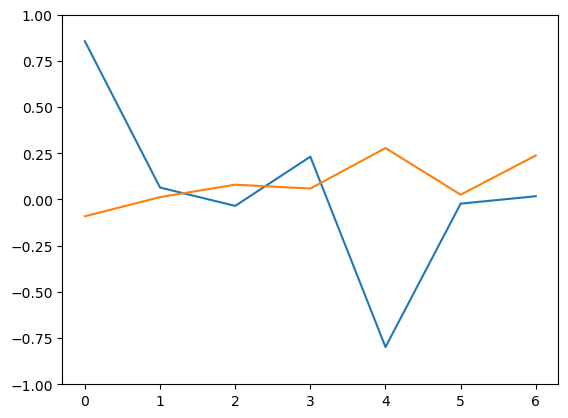

In [31]:
frame = 300
sample = X_test[frame].reshape((1, 128, 64, 1))  # Добавление размерности для пакета (batch size)
prediction = model.predict(sample)
print("Prediction:", np.array(prediction[0]))
print("True value:", np.array(y_test[frame]))
# plt.plot(abs(prediction[0]-y_test[frame]))
plt.plot(prediction[0])
plt.plot(y_test[frame])
plt.ylim(-1, 1)

In [5]:
import numpy as np
from scipy.special import binom
from functools import lru_cache
import matplotlib.pyplot as plt

def nm_to_noll(n, m):
    j = (n*(n+1))//2 + abs(m)
    if m> 0 and n%4 in (0,1): return j
    if m< 0 and n%4 in (2,3): return j
    if m>=0 and n%4 in (2,3): return j+1
    if m<=0 and n%4 in (0,1): return j+1
    assert False


def nm_to_ansi(n, m):
    return (n*(n+2) + m) // 2


def nm_normalization(n, m):
    """the norm of the zernike mode n,m in born/wolf convetion

    i.e. sqrt( \int | z_nm |^2 )
    """
    return np.sqrt((1.+(m==0))/(2.*n+2))


def nm_polynomial(n, m, rho, theta, normed=True):
    """returns the zernike polyonimal by classical n,m enumeration

    if normed=True, then they form an orthonormal system

        \int z_nm z_n'm' = delta_nn' delta_mm'

        and the first modes are

        z_nm(0,0)  = 1/sqrt(pi)*
        z_nm(1,-1) = 1/sqrt(pi)* 2r cos(phi)
        z_nm(1,1)  = 1/sqrt(pi)* 2r sin(phi)
        z_nm(2,0)  = 1/sqrt(pi)* sqrt(3)(2 r^2 - 1)
        ...
        z_nm(4,0)  = 1/sqrt(pi)* sqrt(5)(6 r^4 - 6 r^2 +1)
        ...

    if normed =False, then they follow the Born/Wolf convention
        (i.e. min/max is always -1/1)

        \int z_nm z_n'm' = (1.+(m==0))/(2*n+2) delta_nn' delta_mm'

        z_nm(0,0)  = 1
        z_nm(1,-1) = r cos(phi)
        z_nm(1,1)  =  r sin(phi)
        z_nm(2,0)  = (2 r^2 - 1)
        ...
        z_nm(4,0)  = (6 r^4 - 6 r^2 +1)


    """
    if abs(m) > n:
        raise ValueError(" |m| <= n ! ( %s <= %s)" % (m, n))

    if (n - m) % 2 == 1:
        return 0 * rho + 0 * theta

    radial = 0
    m0 = abs(m)

    for k in range((n - m0) // 2 + 1):
        radial += (-1.) ** k * binom(n - k, k) * binom(n - 2 * k, (n - m0) // 2 - k) * rho ** (n - 2 * k)

    radial *= (rho <= 1.)

    if normed:
        prefac = 1. / nm_normalization(n, m)
    else:
        prefac = 1.
    if m >= 0:
        return prefac * radial * np.cos(m0 * theta)
    else:
        return prefac * radial * np.sin(m0 * theta)


@lru_cache(maxsize=32)
def rho_theta(size):
    r = np.linspace(-1,1,size)
    X,Y = np.meshgrid(r,r, indexing='ij')
    rho = np.hypot(X,Y)
    theta = np.arctan2(Y,X)
    return rho, theta


@lru_cache(maxsize=32)
def outside_mask(size):
    rho, theta = rho_theta(size)
    return nm_polynomial(0, 0, rho, theta, normed=False) < 1


def dict_to_list(kv):
    max_key = max(kv.keys())
    out = [0]*(max_key+1)
    for k,v in kv.items():
        out[k] = v
    return out


def ensure_dict(values, order):
    if isinstance(values,dict):
        return values
    if isinstance(values,np.ndarray):
        values = tuple(values.ravel())
    if isinstance(values,(tuple,list)):
        order = str(order).lower()
        order in ('noll','ansi') or print("Could not identify the Zernike nomenclature/order")
        offset = 1 if order=='noll' else 0
        indices = range(offset,offset+len(values))
        return dict(zip(indices,values))
    raise ValueError("Could not identify the data type for dictionary formation")



class Zernike:

    """
        Encapsulates Zernike polynomials

        :param index: string, integer or tuple, index of Zernike polynomial e.g. 'defocus', 4, (2,2)
        :param oder: string, defines the Zernike nomenclature if index is an integer, eg noll or ansi, default is noll
    """

    _ansi_names = ['piston', 'tilt', 'tip', 'oblique astigmatism', 'defocus',
                   'vertical astigmatism', 'vertical trefoil', 'vertical coma',
                   'horizontal coma', 'oblique trefoil', 'oblique quadrafoil',
                   'oblique secondary astigmatism', 'primary spherical',
                   'vertical secondary astigmatism', 'vertical quadrafoil']
    _nm_pairs = set((n,m) for n in range(200) for m in range(-n,n+1,2))
    _noll_to_nm = dict(zip((nm_to_noll(*nm) for nm in _nm_pairs),_nm_pairs))
    _ansi_to_nm = dict(zip((nm_to_ansi(*nm) for nm in _nm_pairs),_nm_pairs))

    def __init__(self, index, order='noll'):
        super().__setattr__('_mutable', True)
        if isinstance(index,str):
            if index.isdigit():
                index = int(index)
            else:
                name = index.lower()
                name in self._ansi_names or print("Your input for index is string : Could not identify the name of Zernike polynomial")
                index = self._ansi_names.index(name)
                order = 'ansi'

        if isinstance(index,(list,tuple)) and len(index)==2:
            self.n, self.m = int(index[0]), int(index[1])
            (self.n, self.m) in self._nm_pairs or print("Your input for index is list/tuple : Could not identify the n,m order of Zernike polynomial")
        elif isinstance(index,int):
            order = str(order).lower()
            order in ('noll','ansi') or print("Your input for index is int : Could not identify the Zernike nomenclature/order")
            if order == 'noll':
                index in self._noll_to_nm or print("Your input for index is int and input for Zernike nomenclature is Noll: Could not identify the Zernike polynomial with this index")
                self.n, self.m = self._noll_to_nm[index]
            elif order == 'ansi':
                index in self._ansi_to_nm or print("Your input for index is int and input for Zernike nomenclature is ANSI: Could not identify the Zernike polynomial with this index")
                self.n, self.m = self._ansi_to_nm[index]
        else:
            raise ValueError("Could not identify your index input, we accept strings, lists and tuples only")

        self.index_noll = nm_to_noll(self.n, self.m)
        self.index_ansi = nm_to_ansi(self.n, self.m)
        self.name = self._ansi_names[self.index_ansi] if self.index_ansi < len(self._ansi_names) else None
        self._mutable = False


    def polynomial(self, size, normed=True, outside=np.nan):
        
        """
            For visualization of Zernike polynomial on a disc of unit radius

            :param size: integer, Defines the shape of square grid, e.g. 256 or 512
            :param normed: boolen, Whether the Zernike polynomials are normalized, default is True
            :param outside: scalar, Outside padding of the spherical disc defined within a square grid, default is np.nan
            :return: 2D array, Zernike polynomial computed on a disc of unit radius defined within a square grid  
        """

        np.isscalar(size) and int(size) > 0 or print("error size")
        return self.phase(*rho_theta(int(size)), normed=normed, outside=outside)


    def polynomial_vertical(self, size, normed=True, outside=np.nan):  # added by srio
        np.isscalar(size) and int(size) > 0 or print("error size")

        rho = np.linspace(-1.0,1.0,size)
        w = nm_polynomial(self.n, self.m, rho, 0.0, normed=bool(normed))
        if outside is not None:
            w[nm_polynomial(0, 0, rho, 0.0, normed=False) < 1] = outside
        return w

    def phase(self, rho, theta, normed=True, outside=None):

        """
            For creation of a Zernike polynomial  with a given polar co-ordinate system

            :param rho: 2D square array,  radial axis
            :param theta: 2D square array, azimuthal axis
            :param normed: boolen, whether the Zernike polynomials are normalized, default is True
            :param outside: scalar, outside padding of the spherical disc defined within a square grid, default is None
            :return: 2D array, Zernike polynomial computed for rho and theta
        """
        (isinstance(rho,np.ndarray) and rho.ndim==2 and rho.shape[0]==rho.shape[1]) or print('Only 2D square array for radial co-ordinate is accepted')
        (isinstance(theta,np.ndarray) and theta.shape==rho.shape) or print('Only 2D square array for azimutha co-ordinate is accepted')
        size = rho.shape[0]
        np.isscalar(normed) or print("error")
        outside is None or np.isscalar(outside) or print("Only scalar constant value for outside is accepted")
        w = nm_polynomial(self.n, self.m, rho, theta, normed=bool(normed))
        if outside is not None:
            w[nm_polynomial(0, 0, rho, theta, normed=False) < 1] = outside 

        return w


    def __hash__(self):
        return hash((self.n,self.m))


    def __eq__(self, other):
        return isinstance(other,Zernike) and (self.n,self.m) == (other.n,other.m)


    def __lt__(self, other):
        return self.index_ansi < other.index_ansi


    def __setattr__(self, *args):
        if self._mutable:
            super().__setattr__(*args)
        else:
            raise AttributeError('Zernike is immutable')


    def __repr__(self):
        return f'Zernike(n={self.n}, m={self.m: 1}, noll={self.index_noll:2}, ansi={self.index_ansi:2}' + (f", name='{self.name}')" if self.name is not None else ")")
    


def zernike_polinom(noll=[6, 8, 10, 11, 14, 22, 37],
                    size=128,
                    c=[1, 1, 1, 1, 1, 1, 1],
                    do_plot=True):

    x = np.linspace(-1, 1, size)

    y = np.zeros_like(x)

    for ij, j in enumerate(noll):
        z = Zernike(j, order='noll')
        w = z.polynomial_vertical(size)
        y += c[ij] * w

    if do_plot: plt.plot(x, y)

    return y

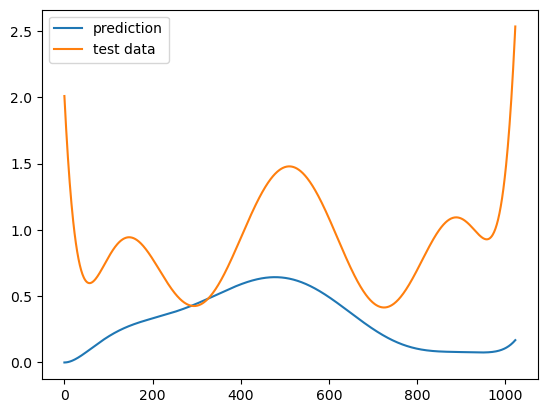

In [32]:
plt.plot(zernike_polinom(c=np.array(prediction[0]), size=1024, do_plot=False), label="prediction")
plt.plot(zernike_polinom(c=np.array(y_test[frame]), size=1024, do_plot=False)+0.7, label="test data")
plt.legend()